In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [2]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils, viz, predict

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


## Train Deepspeech

In [3]:
dry = True
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p = model.HParams(n_mels=20, datasets_dir='/srv/datasets', graphemes=datasets.YESNO_GRAPHEMES)
tp = train.HParams(max_epochs=50, batch_size=72, grad_norm_clip=200, num_workers=0)
ds = datasets.YesNo(p)
m = model.DeepSpeech(p)
trainset, testset = datasets.splits(ds, p)

# train
t = train.Trainer(m, trainset, testset, tp)

In [5]:
t.train()

wandb: Offline run mode, not syncing to the cloud.
wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` to enable cloud syncing.
wandb: WARNING Symlinked 1 file into the W&B run directory, call wandb.save again to sync new files.
  0%|          | 0/1 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functi

tensor(4.4768, device='cuda:0')


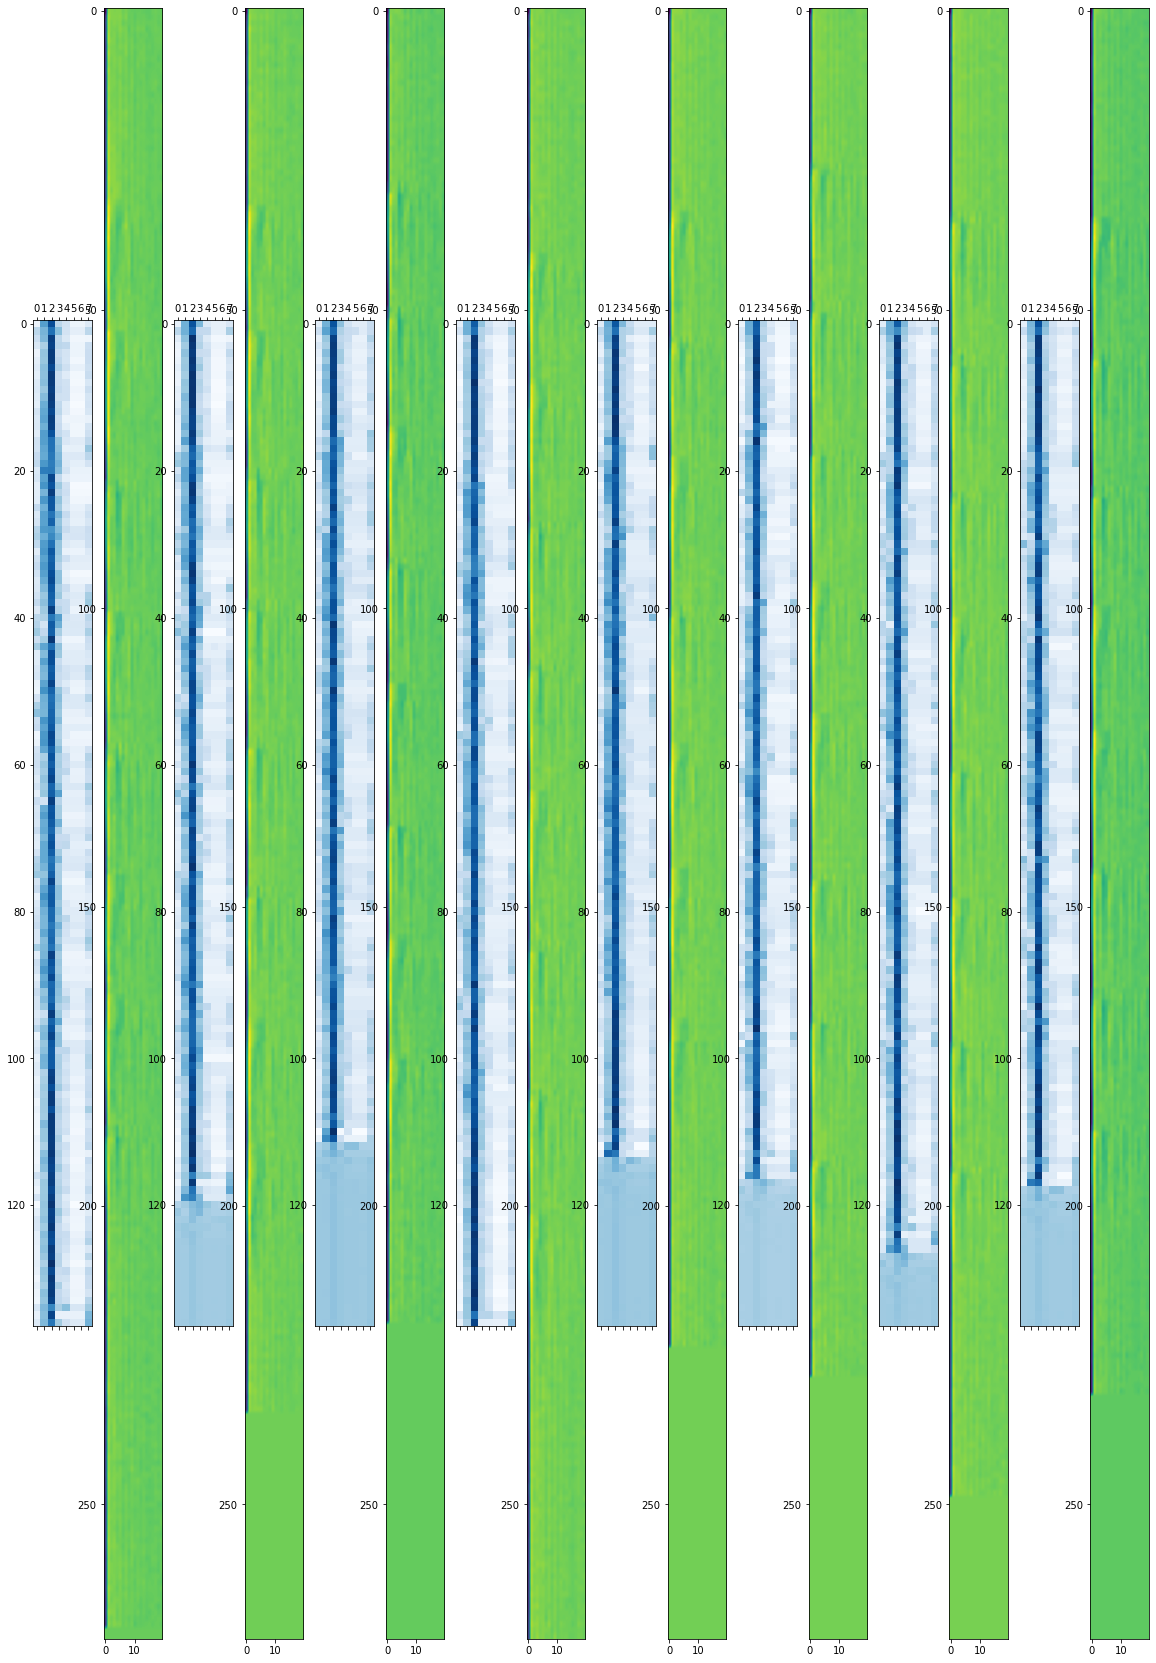

In [6]:
viz.ctc_batch(m, [testset[i] for i in range(8)], p)

In [7]:
yhat, loss = predict.predict_batch(m, [testset[i] for i in range(8)], p)
print(predict.decode_argmax(yhat, p))

['k', 'klkek', 'knek', 'k', 'kek ek', 'klkek', 'klkek', 'kek']


In [8]:
testset[0][1]

'lor lor ken lor ken lor lor ken'